In [16]:
import os
for file in os.listdir('/content/train/'):
  os.remove('/content/train/'+file)
os.rmdir('/content/train/')
for file in os.listdir('/content/resized_train/'):
  os.remove('/content/resized_train/'+file)
os.rmdir('/content/resized_train/')

In [1]:
!pip install kaggle

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing dataset

In [11]:
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:10<00:00, 57.7MB/s]
100% 812M/812M [00:10<00:00, 79.4MB/s]


In [12]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [13]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as file:
  file.extractall()
  print("Extracted")

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as file:
  file.extractall()
  print("Extracted")

Extracted
Extracted


In [14]:
import os

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Images: ", file_count)

Images:  25000


Printing name of images

In [15]:
file_names = os.listdir('/content/')
print(file_names)

['.config', 'train', 'train.zip', 'test1.zip', 'sampleSubmission.csv', 'dogs-vs-cats.zip', 'kaggle.json', 'sample_data']


In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Display some images

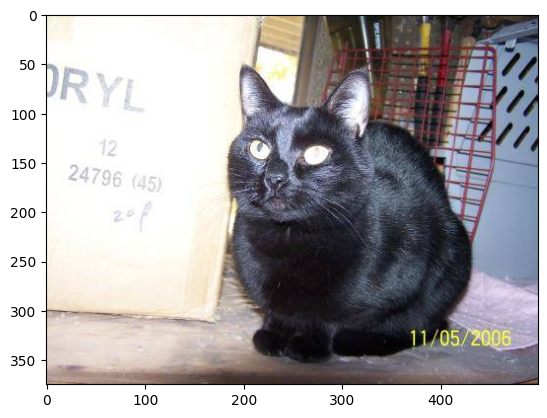

In [24]:
img1 = mpimg.imread('/content/train/cat.10003.jpg')

imgplt1 = plt.imshow(img1)

plt.show()


In [18]:
file_names = os.listdir('/content/train/')

dog_count, cat_count = 0, 0

for image in file_names:
  if (image[0:3] == 'dog'):
    dog_count += 1
  else:
    cat_count += 1

print(dog_count, cat_count)

12500 12500


Resizing all images

In [19]:
os.mkdir('/content/resized_train')

In [20]:
original = '/content/train/'
resized = '/content/resized_train/'

for i in range(2000):
  filename = os.listdir(original)[i]
  img_path = original + filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  new_path = resized + filename
  img.save(new_path)

print('resized')

resized


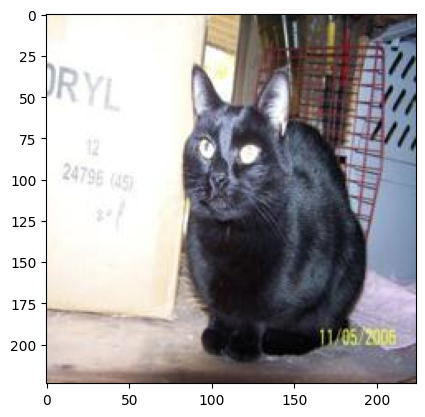

In [23]:
img1 = mpimg.imread('/content/resized_train/cat.10003.jpg')
imgplt1 = plt.imshow(img1)

plt.show()

Creating lables for resized images

In [25]:
# Cat -> 0, Dog -> 1

resized_images = os.listdir('/content/resized_train/')
labels = []

for i in range(2000):
  filename = resized_images[i]
  label = filename[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [26]:
print(resized_images[0:3])
print(labels[0:3])

['cat.874.jpg', 'cat.5217.jpg', 'dog.4384.jpg']
[0, 0, 1]


In [27]:
values, counts = np.unique(labels, return_counts=True)
print(values, counts)

[0 1] [1000 1000]


Forming numpy array of resized images


In [28]:
import cv2
import glob

In [46]:
dir = '/content/resized_train/'
ext = ['png', 'jpg']

files = []
for e in ext:
    matching_files = glob.glob(dir + '*.' + e)
    files.extend(matching_files)
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [47]:
print(dog_cat_images[0:4])

[[[[173 168 169]
   [173 168 169]
   [170 168 168]
   ...
   [204 204 204]
   [202 202 202]
   [201 201 201]]

  [[173 168 169]
   [173 168 169]
   [170 168 168]
   ...
   [199 199 199]
   [199 199 199]
   [199 199 199]]

  [[173 168 169]
   [173 168 169]
   [170 168 168]
   ...
   [195 195 195]
   [196 196 196]
   [197 197 197]]

  ...

  [[ 96 100 101]
   [ 95  99 100]
   [ 92  96  97]
   ...
   [ 76 102 126]
   [ 77 103 127]
   [ 78 104 128]]

  [[ 96  98  99]
   [ 95  97  98]
   [ 93  95  96]
   ...
   [ 69  97 121]
   [ 72 100 124]
   [ 73 101 125]]

  [[ 94  96  97]
   [ 94  96  97]
   [ 93  95  96]
   ...
   [ 43  71  95]
   [ 45  73  97]
   [ 46  74  98]]]


 [[[ 69  67 109]
   [ 70  68 110]
   [ 71  70 112]
   ...
   [ 27 189 218]
   [ 23 185 214]
   [ 18 180 209]]

  [[ 70  68 110]
   [ 72  70 112]
   [ 72  71 113]
   ...
   [ 30 192 221]
   [ 28 190 219]
   [ 26 188 217]]

  [[ 72  70 112]
   [ 73  71 113]
   [ 74  73 115]
   ...
   [ 30 192 221]
   [ 31 193 222]
   [ 32 194

In [48]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [49]:
type(dog_cat_images)

numpy.ndarray

In [50]:
X = dog_cat_images
Y = np.asarray(labels)

Split training and test data

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [52]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1600, 224, 224, 3) (400, 224, 224, 3) (1600,) (400,)


Scaling the data

In [36]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [37]:
print(X_train_scaled, X_test_scaled)

[[[[0.89019608 0.88627451 0.80784314]
   [0.89019608 0.88627451 0.80784314]
   [0.88627451 0.88235294 0.80392157]
   ...
   [0.79607843 0.5372549  0.34901961]
   [0.80392157 0.54509804 0.35686275]
   [0.80784314 0.54901961 0.36078431]]

  [[0.89411765 0.89019608 0.81176471]
   [0.89019608 0.88627451 0.80784314]
   [0.88627451 0.88235294 0.80392157]
   ...
   [0.80784314 0.54901961 0.36078431]
   [0.8        0.54117647 0.35294118]
   [0.78823529 0.52941176 0.34117647]]

  [[0.89411765 0.89019608 0.81176471]
   [0.89019608 0.88627451 0.80784314]
   [0.88627451 0.88235294 0.80392157]
   ...
   [0.81960784 0.56078431 0.37254902]
   [0.79607843 0.5372549  0.34901961]
   [0.76862745 0.50980392 0.32156863]]

  ...

  [[0.41176471 0.34117647 0.29803922]
   [0.43529412 0.36470588 0.32156863]
   [0.44705882 0.37647059 0.33333333]
   ...
   [0.4        0.29411765 0.27843137]
   [0.38823529 0.28235294 0.26666667]
   [0.38431373 0.27843137 0.2627451 ]]

  [[0.38823529 0.31764706 0.2745098 ]
   [0.4

Build neural network

In [38]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.applications import VGG16

In [39]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

In [40]:
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [41]:
classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(classes),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [42]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])

In [43]:
print(X_train_scaled.shape, Y_train.shape)

(1600, 224, 224, 3) (1600,)


In [44]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 11s 40ms/step - loss: 0.2563 - acc: 0.8800
Epoch 2/5
50/50 [==============================] - 2s 42ms/step - loss: 0.0809 - acc: 0.9744
Epoch 3/5
50/50 [==============================] - 3s 52ms/step - loss: 0.0557 - acc: 0.9831
Epoch 4/5
50/50 [==============================] - 2s 50ms/step - loss: 0.0480 - acc: 0.9875
Epoch 5/5
50/50 [==============================] - 3s 62ms/step - loss: 0.0380 - acc: 0.9925


In [45]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print("Test loss: ", score)
print("Test accuracy: ", acc)

13/13 [==============================] - 2s 106ms/step - loss: 0.0530 - acc: 0.9800
Test loss:  0.05297763645648956
Test accuracy:  0.9800000190734863


Predictor

In [53]:
from google.colab.patches import cv2_imshow

In [60]:
def predict():
  image_path = input("Image to be predicted: ")

  input_image = cv2.imread(image_path)

  cv2_imshow(input_image)

  resized = cv2.resize(input_image, (224, 224))
  scaled = resized/255
  reshaped = np.reshape(scaled, [1, 224, 224, 3])

  prediction = model.predict(reshaped)

  pred_label = np.argmax(prediction)

  print('cat' if pred_label == 0 else 'dog')

Image to be predicted: /content/download.png


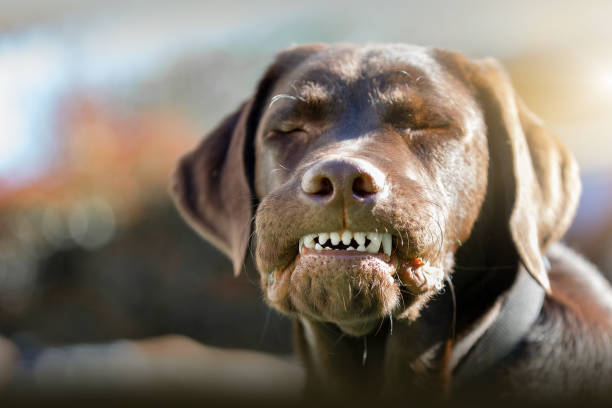

1/1 [==============================] - 0s 34ms/step
dog


In [61]:
predict()

Image to be predicted: /content/mugshot.png


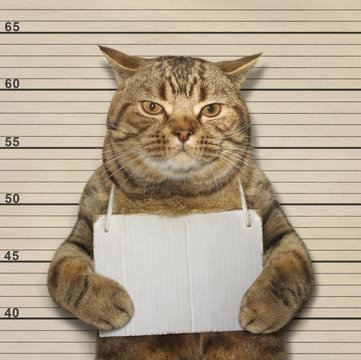

1/1 [==============================] - 0s 25ms/step
cat


In [62]:
predict()